## MODELO GALÁCTICO
## $$ Ángel Uriel Puga Oliveros $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LinearRegression
import sympy as sp

<font color='blue'>Bulbo | MODELO DE PLUMMER</font>

$\Phi_{\scriptscriptstyle P}(r) = \displaystyle -\frac{GM}{\sqrt{r^2+b_1^2}} $

<font color='blue'>DISCO | MIYAMOTO-NAGAI</font>

$\Phi_{\scriptscriptstyle MN}(r,z) = -\frac{\displaystyle GM}{\displaystyle \sqrt{r^2 + (a_2+\sqrt{z^2 + b_2^2})^2}}$

<font color='blue'>NFW | HALO MATERIA OSCURA</font>

$\Phi_{\scriptscriptstyle NFW}(r) = -\displaystyle 4\pi G \rho_0 a_3^2 \left(\frac{\ln\left(1+\frac{r}{a_3}\right)}{\frac{r}{a_3}}\right)$


<font color='blue'>MODELO TOTAL</font>

$\Phi_{\scriptscriptstyle TOT}(r,z) = \Phi_{\scriptscriptstyle P}(r)+ \Phi_{\scriptscriptstyle MN}(r,z)+\Phi_{\scriptscriptstyle NFW}(r)$


In [2]:
#Definición de la derivada de los potenciales

def Plummer(r):  # BULBO 
    return (r*G*M1)/(r**2+b_1**2)**(3/2)

def MN(r):  # DISCO 
    return (r*G*M2) / (r**2 + (a_2 + np.sqrt(z + b_2**2 ))** 2)**(3/2)

def NFW(r):  # MATERIA OSCURA AMARILLO
    return (-4*np.pi*G*rho*a_3**2)/(r*(1+r/a_3))+(4*np.pi*a_3**3*G*rho*np.log(1+r/a_3)/r**2)

def TOT(r):
    return Plummer(r) + MN(r) + NFW(r)


In [26]:
#DEFINO LAS VELOCIDADES DE ROTACION

def VPlummer(r):
    return 9.7*np.sqrt(r*np.abs(Plummer(r)))

def VMN(r):  # DISCO 
    return 9.7*np.sqrt(r*np.abs(MN(r)))

def VNFW(r):  # MATERIA OSCURA AMARILLO
    return 9.7*np.sqrt(r*np.abs(NFW(r)))

def VTOT(r):
    return np.sqrt(VPlummer(r)**2+VMN(r)**2+VNFW(r)**2)

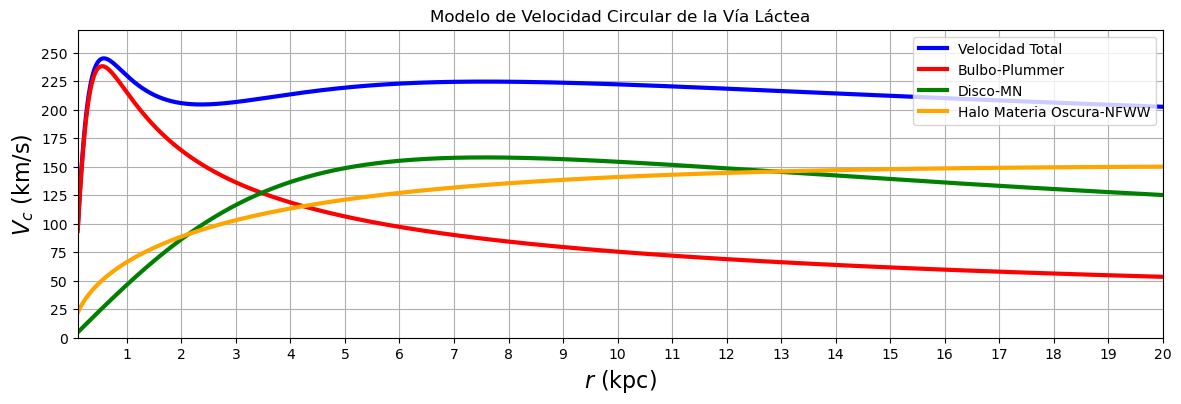

In [28]:
r = np.arange(0.000000000001, 20, 0.001)
G = 1

# Parámetros para el bulbo (Plummer)
M1 = 606.00
b_1 = 0.3873

# Parámetros para el disco (Miyamoto-Nagai)
M2 = 3690
a_2 = 5.1
b_2 = 0.25
z = 0

# Parámetros para la materia oscura (NFW)
M3 = 4615
rho = 80e-2  # Msol kpc^-3
a_3 = 10.5

fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(r, VTOT(r), color='blue', label='Velocidad Total',linewidth=3)
ax.plot(r, VPlummer(r), color='red', label='Bulbo-Plummer',linewidth=3)
ax.plot(r, VMN(r), color='green', label='Disco-MN',linewidth=3)
ax.plot(r, VNFW(r), color='orange', label='Halo Materia Oscura-NFWW',linewidth=3)
ax.set_title('Modelo de Velocidad Circular de la Vía Láctea')
ax.set_ylabel(r'$V_c$ (km/s)')
ax.set_xlabel(r'$r$ (kpc)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.legend(loc='upper right')
ax.grid()
ax.set_ylim(0, 270)
ax.set_xlim(0.1, 20)
# Aumentar el tamaño de los nombres de los ejes
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.show()


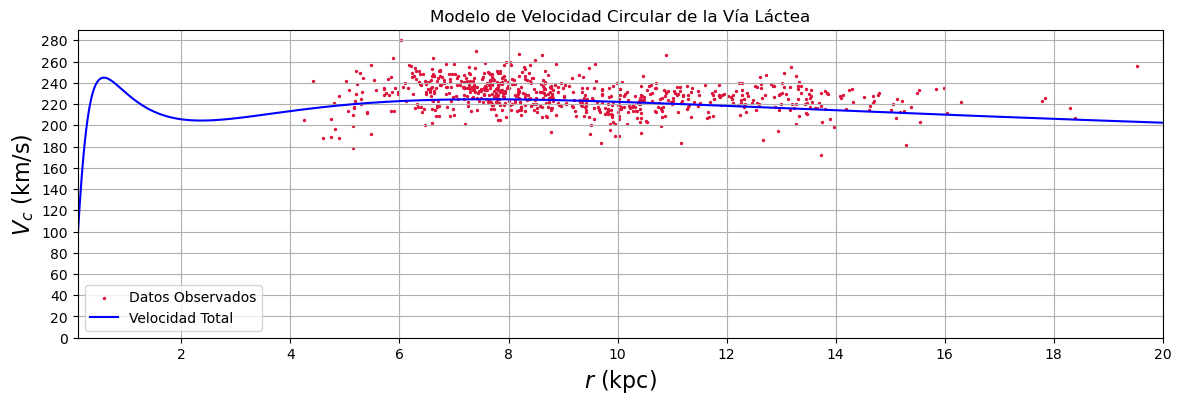

In [18]:
filename = 'rotation_curve.txt'
data = np.genfromtxt(filename, skip_header=55, dtype=None, names=['Name', 'R', 'e_R', 'v_rot', 'e_v_rot'], encoding=None)
fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter(data['R'], data['v_rot'], label='Datos Observados', s=2, color='crimson')
ax.plot(r, VTOT(r), color='blue', label='Velocidad Total') 
ax.set_title('Modelo de Velocidad Circular de la Vía Láctea')
ax.set_ylabel(r'$V_c$ (km/s)')
ax.set_xlabel(r'$r$ (kpc)')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.legend()
ax.grid()
ax.set_ylim(0, 290)
ax.set_xlim(0.1, 20)
# Aumentar el tamaño de los nombres de los ejes
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.show()

In [6]:
import numpy as np
from scipy.optimize import minimize

# Definir tu modelo teórico Vtot que depende de los parámetros b1, a2, b2, a3 y la variable r
def Vtot(r):
    return np.sqrt(9.7**2*r*np.abs((r*606)/(r**2+(0.3873)**2)**(3/2))+9.7**2*r*np.abs((r*3690) / (r**2 + (5.1 + 0.25)** 2)**(3/2))+9.7**2*r*np.abs((-4*np.pi*0.8*10.5**2)/(r*(1+r/10.5))+(4*np.pi*10.5**3*0.8*np.log(1+r/10.5)/r**2)))

# Datos observados
R_observed = data['R']
V_observed = data['v_rot']

# Función de chi-cuadrada
def chi_square(R_observed, V_observed):
    expected_v_rot = Vtot(R_observed)
    chi_square_value = np.sum((V_observed - expected_v_rot)**2 / (expected_v_rot))
    return chi_square_value


chi_square_value = chi_square(R_observed, V_observed)
DOF = len(data)-7
chi_reduced=chi_square_value/DOF
print('chi reduced', chi_reduced)
print("Valor de chi-cuadrada:", chi_square_value)

chi reduced 1.0645845737516537
Valor de chi-cuadrada: 780.3404925599622


In [1]:
# Parámetros para el bulbo (Plummer)
M1 = 606.00
M2 = 3690
b1 = 0.3873
a2 = 5.1
b2 = 0.25
a3 = 10.5
rho=0.98

# Definición de los potenciales
def pot_Plummer(R, z):  # BULBO 
    return (-M1) / np.sqrt(R**2 + z**2 + b1**2)

def pot_MN(R, z):  # DISCO 
    return -M2 / (np.sqrt(R**2 + (a2 + np.sqrt(z**2 + (b2)**2))**2))

def pot_NFW(R, z):  # MATERIA OSCURA AMARILLO
    return (-4 * np.pi * rho* a3**2) * np.log(1 + np.sqrt(R**2 + z**2) / a3) / (np.sqrt(R**2 + z**2) / a3)

def pot_TOT(R, z):
    return pot_Plummer(R, z) + pot_MN(R, z) + pot_NFW(R, z)

# Rangos para los ejes
x_min, x_max = 0, 12
y_min, y_max = -2, 2

# Crear la malla
x_arr = np.linspace(x_min, x_max, 400)
y_arr = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x_arr, y_arr)

# Crear la figura

plt.figure(figsize=(16, 6))
EPOT = np.log(np.abs(pot_TOT(X,Y)))
# Crear los contornos equipotenciales
contourf = plt.contourf(X, Y,EPOT,15, cmap='plasma')

# Agregar la barra de colores
plt.colorbar(contourf, label='Potencial')
# Agregar líneas de contorno
contour = plt.contour(X, Y,EPOT, colors='navy',linestyles='solid',levels=15)

# Etiquetas y título con tamaños de fuente ajustados
plt.xlabel('$R$', fontsize=16)
plt.ylabel('$Z$', fontsize=16)

# Ajustar el tamaño y el color de los ticks de los ejes
plt.tick_params(axis='both', which='major', labelsize=15, colors='black')
plt.grid()

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

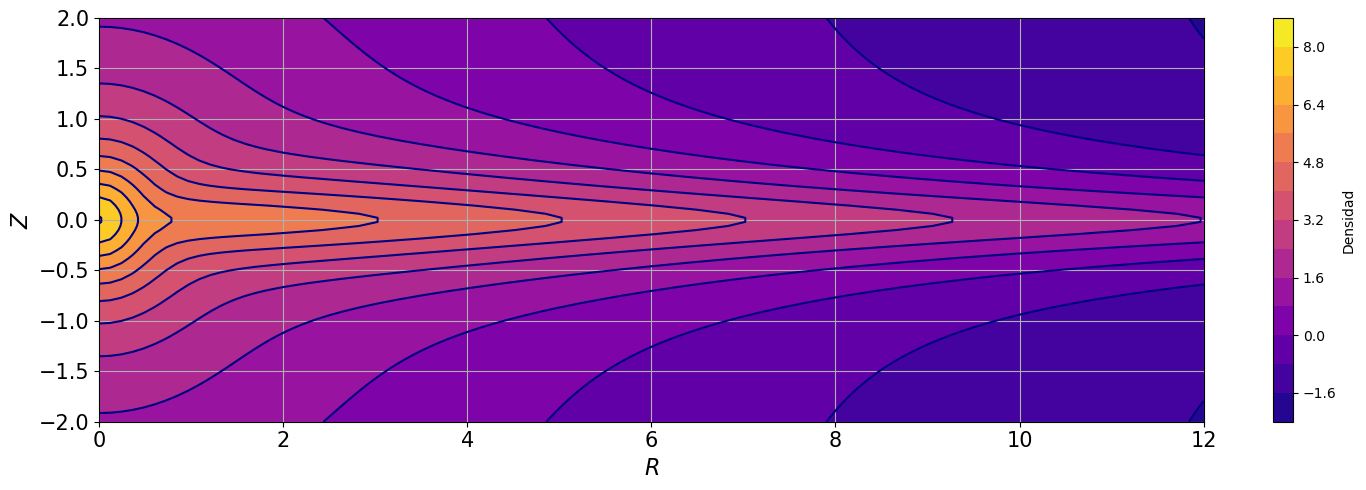

In [23]:
# Parámetros para el bulbo (Plummer)
M1 = 606.00
M2 = 3690
b1 = 0.3873
a2 = 5.1
b2 = 0.25
a3 = 10.5
rho = 0.98
#DEFINO LOS POTENCIALES PARA LAS CURVAS ISODENSIDADES
def dens_Plummer(R,z):  # BULBO 
    return (3*M1*b1**2)/(4*np.pi*((R**2+z**2+b1**2))**(5/2))
    #return (M1/(2*np.pi))*(b1/(np.sqrt(R**2+z**2)*(np.sqrt(R**2+z**2)+b1)**3))

def dens_MN(R,z):  # DISCO   
    return ((b2**2 * M2)/ (4*np.pi)) * (a2 * (np.sqrt(R**2 + z**2)**2 + (a2 + 3 * np.sqrt(z**2 + b2**2)) * (a2 + np.sqrt(z**2 + b2**2))**2) /  ((np.sqrt(R**2 + z**2)**2 + (a2 + np.sqrt(z**2 + b2**2))**2)**(5/2) * (z**2 + b2**2)**(3/2)))

def dens_NFW(R,z):  # MATERIA OSCURA AMARILLO
    return rho/((np.sqrt(R**2+z**2)/a3)*(1+np.sqrt(R**2+z**2)/a3)**2)

def dens_TOT(R,z):
    return dens_Plummer(R,z) + dens_MN(R,z) + dens_NFW(R,z)

x_min, x_max = 0, 12
y_min, y_max = -2, 2

x_arr = np.linspace(x_min, x_max, 100)
y_arr = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_arr, y_arr)

plt.figure(figsize=(15, 5))
DPOT = np.log(np.abs(dens_TOT(X,Y)))

#ISODENSIDAD
contour = plt.contour(X, Y,DPOT, colors='navy',linestyles='solid',levels=15)
# Crear los contornos equipotenciales
contourf = plt.contourf(X, Y,DPOT,15, cmap='plasma')

# Agregar la barra de colores
plt.colorbar(contourf, label='Densidad')
# Etiquetas y título con tamaños de fuente ajustados
plt.xlabel('$R$', fontsize=16)
plt.ylabel('$Z$', fontsize=16)

# Ajustar el tamaño y el color de los ticks de los ejes
plt.tick_params(axis='both', which='major', labelsize=15, colors='black')
plt.grid()
plt.tight_layout()
plt.show()